In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mutual_exclusion import MSG_IDS
%matplotlib inline
base_path = ''#'/mnt/d/OneDrive/Documents/Facul/Sistemas Distribuídos/trabalho3'

In [2]:
n_processes = [2,4,8,16,32,64,128]
r=3
k=0
execution_times = list()
for n in n_processes:
    log_path = os.path.join(base_path, f'{n}_{r}_{k}resultado.log')
    results_path = os.path.join(base_path, f'{n}_{r}_{k}resultado.txt')
    log_frame = pd.read_csv(log_path, sep=';')
    log_frame.columns = ['timestamp', 'id', 'action']
    log_frame['timestamp'] = pd.to_datetime(log_frame['timestamp'], unit='s')
    log_frame['action'] = log_frame['action'].map({i: action for i, action in zip(range(len(MSG_IDS)), MSG_IDS)})

    results_frame = pd.read_csv(results_path, sep=';')
    results_frame.columns = ['timestamp', 'id']
    results_frame['timestamp'] = pd.to_datetime(results_frame['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

    grants = 0
    releases = 0
    queue = list()
    for idx, row in log_frame.iterrows():

        #Checks for two consecutive releases or grants
        if row['action'] == 'grant':
            grants += 1
            if (grants - releases) != 1:
                raise ValueError(f'Two sequential grants {grants}, {releases}, {idx}')
        elif row['action'] == 'release':
            releases += 1
            if (grants - releases) != 0:
                raise ValueError(f'Two sequential releases {grants}, {releases}, {idx}')
        
        #Checks if release follows queue order
        if row['action'] == 'request':
            queue.append(row['id'])
        elif row['action'] == 'release':
            released_id = queue.pop(0)
            if released_id != row['id']:
                raise ValueError(f'Released item out of queue order, {released_id}, {row["id"]}, {idx}')
    
    execution_times.append(results_frame.iloc[-1]['timestamp'] - results_frame.iloc[0]['timestamp'])
print('Everything okay')

Everything okay


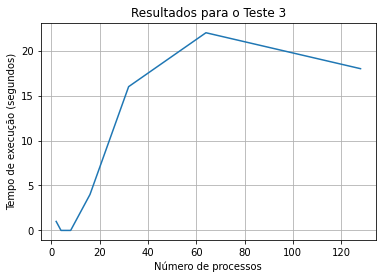

In [3]:
plt.subplots(1,1)
plt.plot(n_processes, [td.seconds for td in execution_times])
plt.xlabel('Número de processos')
plt.ylabel('Tempo de execução (segundos)')
plt.title(f'Resultados para o Teste 3')
plt.grid()
plt.savefig(os.path.join(base_path, f'{r}_{k}_plot.png'), dpi=200)